In [1]:
from heartpredictions.Commun import *
from heartpredictions.LogisticRegression import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data location

In [2]:
data_path = "../data/clean_data.csv"
save_directory = "current_accuracies/logistic_regression/logistic_regression_weights"
accuracies_file_path = "current_accuracies/logistic_regression/LogisticRegression_accuracies.pkl"

if not os.path.isdir(save_directory):
    os.mkdir(save_directory)

# Load data

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.shape

(11627, 39)

In [5]:
df.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [6]:
df.iloc[:, 1: 23].columns, df.iloc[:, 23: 31].columns

(Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
        'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
        'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
        'LDLC'],
       dtype='object'),
 Index(['DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD',
        'HYPERTEN'],
       dtype='object'))

In [7]:
print(df.iloc[:, 1: 23].shape[1], df.iloc[:, 23: 31].shape[1])

22 8


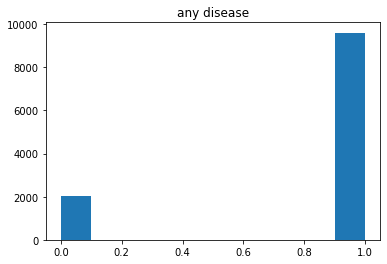

In [8]:
data = np.loadtxt(data_path, delimiter=",", dtype=np.float32, skiprows=1)
amax_label = np.amax(data[:, 23:31], axis=1)
hist,bins = np.histogram(amax_label) 

plt.hist(amax_label, bins = bins) 
plt.title("any disease") 
plt.show()

In [9]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448.0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,2448.0,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.794,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,6238.0,0.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,6238.0,0.0,260.0,52.0,105.0,70.0,0.0,0.0,29.430,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,6238.0,0.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212.0,1.0,173.0,46.0,126.0,82.0,0.0,0.0,19.170,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11623,9998212.0,1.0,153.0,52.0,143.0,89.0,0.0,0.0,25.740,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11624,9999312.0,0.0,196.0,39.0,133.0,86.0,1.0,30.0,20.910,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0
11625,9999312.0,0.0,240.0,46.0,138.0,79.0,1.0,20.0,26.390,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0


# Prepare the data

In [10]:
TEST_SPLIT = 0.2
VALIDATION_SPLIT = 0.21
TRAIN_SPLIT = 1 - TEST_SPLIT - VALIDATION_SPLIT

split_proportions = [TRAIN_SPLIT, VALIDATION_SPLIT, TEST_SPLIT]

# Data verification

In [11]:
heart_dataset = HeartDiseaseDataset(data_path, any_disease=False)
train_dataloader_verif, val_dataloader_verif, test_dataloader_verif = create_dataloaders(heart_dataset, batch_size=1, split_proportions=split_proportions)

In [12]:
participant = next(iter(train_dataloader_verif))
print('input ==>\n', participant[0])
print('label ==>\n', participant[1])

input ==>
 tensor([[0.0000, 0.0849, 0.6735, 0.2701, 0.5083, 0.0000, 0.0000, 0.6941, 0.0000,
         1.0000, 0.2350, 0.1048, 0.6667, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.8960, 1.0000, 0.1955, 0.3376]])
label ==>
 tensor([[0., 1.]])


==== Training DEATH ====

Epoch 1 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2908 - acc: 0.7048 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 812us/step - loss: 0.5316 - acc: 0.7519 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.753
Epoch 2 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2612 - acc: 0.7444 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 767us/step - loss: 0.1108 - acc: 0.7803 - lr: 0.0500
Model saved. Acc updated: 0.753 -> 0.765
Epoch 3 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.2469 - acc: 0.7676 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 835us/step - loss: 0.0603 - acc: 0.7778 - lr: 0.0500
Model saved. Acc updated: 0.765 -> 0.774
Epoch 4 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2454 - acc: 0.7706 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 803us/ste

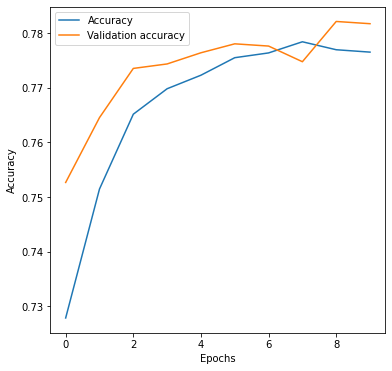




==== Training ANGINA ====

Epoch 1 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2007 - acc: 0.8535 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 803us/step - loss: 0.8910 - acc: 0.8841 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.889
Epoch 2 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1730 - acc: 0.8881 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 805us/step - loss: 0.0355 - acc: 0.8919 - lr: 0.0500
Epoch 3 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.1611 - acc: 0.8958 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 804us/step - loss: 0.0283 - acc: 0.8903 - lr: 0.0500
Epoch 4 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1641 - acc: 0.8934 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 773us/step - loss: 1.1538 - acc: 0.8945 - lr: 0.0500
Epoch 5 / 10
6860/6860 [==========

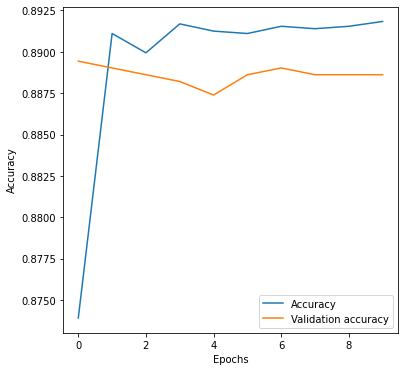




==== Training HOSPMI ====

Epoch 1 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1649 - acc: 0.9012 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 747us/step - loss: 0.0221 - acc: 0.9094 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.903
Epoch 2 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1388 - acc: 0.9059 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 822us/step - loss: 0.0185 - acc: 0.9141 - lr: 0.0500
Model saved. Acc updated: 0.903 -> 0.915
Epoch 3 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.1406 - acc: 0.9083 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 791us/step - loss: 0.0118 - acc: 0.9203 - lr: 0.0500
Model saved. Acc updated: 0.915 -> 0.916
Epoch 4 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.1359 - acc: 0.9148 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 809us

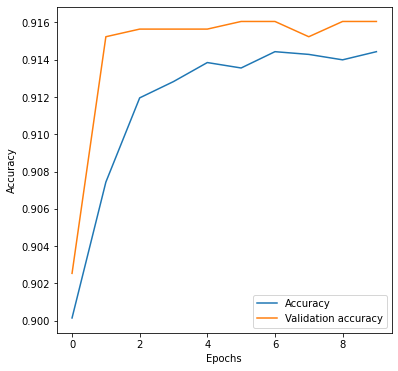




==== Training MI_FCHD ====

Epoch 1 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2117 - acc: 0.8440 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 794us/step - loss: 0.0661 - acc: 0.8663 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.868
Epoch 2 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1834 - acc: 0.8638 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 769us/step - loss: 0.0401 - acc: 0.8840 - lr: 0.0500
Model saved. Acc updated: 0.868 -> 0.872
Epoch 3 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1812 - acc: 0.8623 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 825us/step - loss: 0.0404 - acc: 0.8700 - lr: 0.0500
Model saved. Acc updated: 0.872 -> 0.872
Epoch 4 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1783 - acc: 0.8656 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 790u

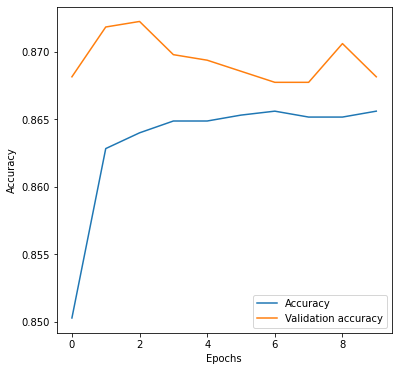




==== Training ANYCHD ====

Epoch 1 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2692 - acc: 0.7570 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 807us/step - loss: 0.1980 - acc: 0.8028 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.804
Epoch 2 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.2334 - acc: 0.7980 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 820us/step - loss: 0.1248 - acc: 0.8069 - lr: 0.0500
Epoch 3 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.2254 - acc: 0.8018 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 774us/step - loss: 0.0930 - acc: 0.8052 - lr: 0.0500
Epoch 4 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2339 - acc: 0.7847 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 819us/step - loss: 0.5918 - acc: 0.7903 - lr: 0.0500
Epoch 5 / 10
6860/6860 [==========

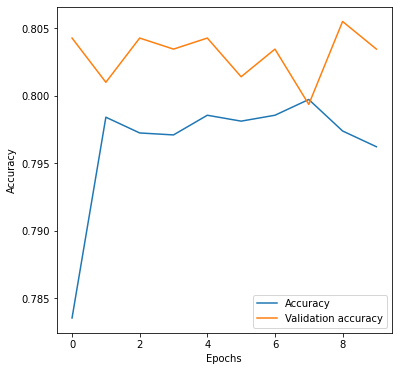




==== Training STROKE ====

Epoch 1 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.1602 - acc: 0.9088 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 810us/step - loss: 0.0347 - acc: 0.9125 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.913
Epoch 2 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1385 - acc: 0.9078 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 781us/step - loss: 0.0256 - acc: 0.9104 - lr: 0.0500
Model saved. Acc updated: 0.913 -> 0.914
Epoch 3 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.1341 - acc: 0.9098 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 806us/step - loss: 0.0198 - acc: 0.9068 - lr: 0.0500
Model saved. Acc updated: 0.914 -> 0.916
Epoch 4 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1347 - acc: 0.9116 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 821us

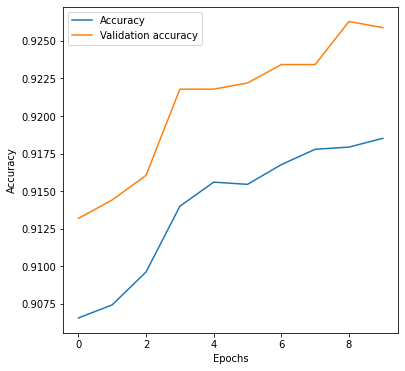




==== Training CVD ====

Epoch 1 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2723 - acc: 0.7377 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 804us/step - loss: 0.6171 - acc: 0.7802 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.785
Epoch 2 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2384 - acc: 0.7808 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 799us/step - loss: 0.1327 - acc: 0.7829 - lr: 0.0500
Model saved. Acc updated: 0.785 -> 0.788
Epoch 3 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.2269 - acc: 0.7985 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 831us/step - loss: 0.0600 - acc: 0.8004 - lr: 0.0500
Model saved. Acc updated: 0.788 -> 0.789
Epoch 4 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2294 - acc: 0.7932 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 796us/st

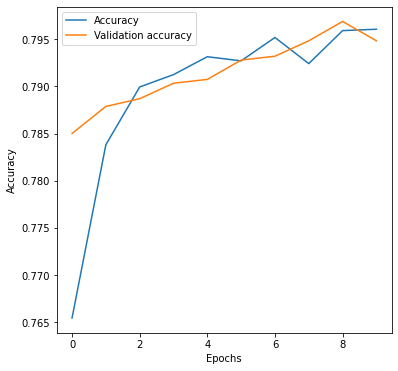




==== Training HYPERTEN ====

Epoch 1 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.2278 - acc: 0.7464 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 736us/step - loss: 0.4218 - acc: 0.8073 - lr: 0.0500
Model saved. Acc updated: -inf -> 0.799
Epoch 2 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1808 - acc: 0.7911 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 789us/step - loss: 0.0093 - acc: 0.7922 - lr: 0.0500
Epoch 3 / 10
6860/6860 [==============================] - 7s 1ms/step - loss: 0.1746 - acc: 0.7989 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 811us/step - loss: 0.0051 - acc: 0.7710 - lr: 0.0500
Epoch 4 / 10
6860/6860 [==============================] - 8s 1ms/step - loss: 0.1724 - acc: 0.8036 - lr: 0.0500
Validation
2442/2442 [==============================] - 2s 786us/step - loss: 3.7194e-04 - acc: 0.8100 - lr: 0.0500
Model saved. Acc updated: 0.

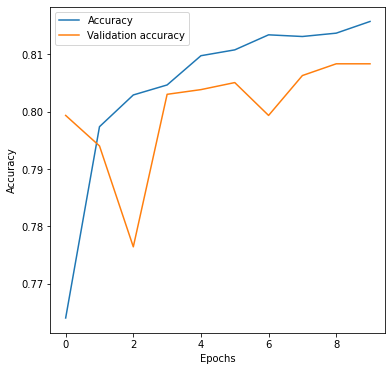

In [13]:
nb_epochs = 10
trainers = train_labels(df.iloc[:, 23: 31].columns, data_path, 
                        df.iloc[:, 23: 31].columns, split_proportions, 
                        save_directory, nb_epochs)

# Test

==== Evaluate DEATH ====

accuracy 78.66666666666667


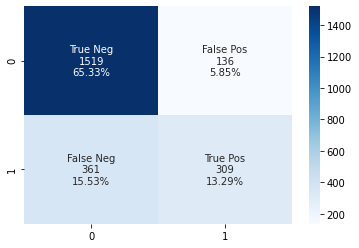

sensitivity : 0.46119402985074626, specificity : 0.9178247734138972, PPV : 0.6943820224719102, NPV : 0.8079787234042554



==== Evaluate ANGINA ====

accuracy 88.17204301075269


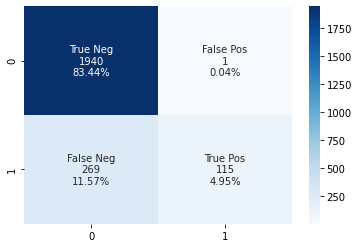

sensitivity : 0.2994791666666667, specificity : 0.9994848016486347, PPV : 0.9913793103448276, NPV : 0.8782254413761883



==== Evaluate HOSPMI ====

accuracy 92.04301075268818


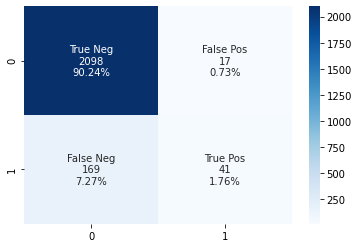

sensitivity : 0.19523809523809524, specificity : 0.9919621749408983, PPV : 0.7068965517241379, NPV : 0.925452139391266



==== Evaluate MI_FCHD ====

accuracy 88.0


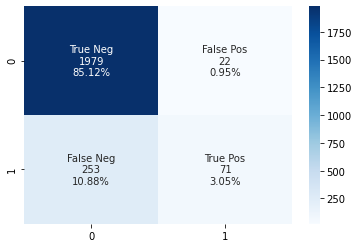

sensitivity : 0.2191358024691358, specificity : 0.9890054972513743, PPV : 0.7634408602150538, NPV : 0.8866487455197133



==== Evaluate ANYCHD ====

accuracy 80.25806451612904


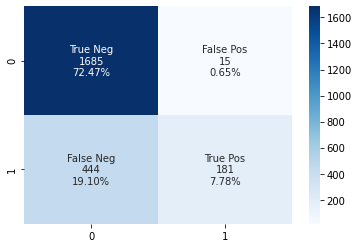

sensitivity : 0.2896, specificity : 0.9911764705882353, PPV : 0.923469387755102, NPV : 0.791451385627055



==== Evaluate STROKE ====

accuracy 91.91397849462365


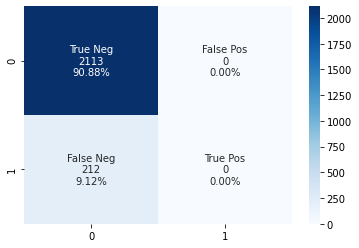

/home/jpenney/heart-prediction/heartpredictions/LogisticRegression/save_and_predict.py:83: RuntimeWarning: invalid value encountered in long_scalars
  


sensitivity : 0.0, specificity : 1.0, PPV : no positives values, NPV : 0.9088172043010753



==== Evaluate CVD ====

accuracy 80.94623655913979


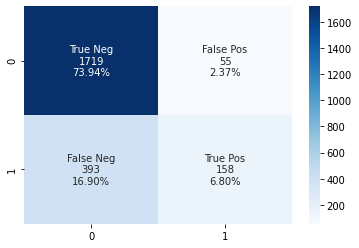

sensitivity : 0.2867513611615245, specificity : 0.9689966178128523, PPV : 0.7417840375586855, NPV : 0.8139204545454546



==== Evaluate HYPERTEN ====

accuracy 83.01075268817205


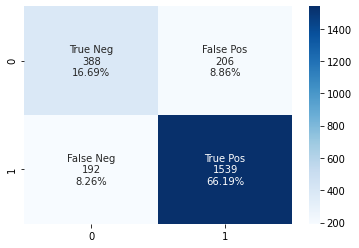

sensitivity : 0.8890814558058926, specificity : 0.6531986531986532, PPV : 0.8819484240687679, NPV : 0.6689655172413793





In [14]:
accuracies = prediction_analyse_labels(df.iloc[:, 23: 31].columns, trainers, df.iloc[:, 23: 31].columns, data_path, split_proportions)

In [15]:
save_accuracies_pkl(accuracies_file_path, accuracies)